# 중간고사 대비

- toc:true
- branch: master
- badges: true
- comments: true
- editor : 이강철
- hide : false
- published : true

## 1주차 : 단순선형회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 온도에 따른 아메리카노 판매량

$$아이스 아메리카노  = \beta_1 \times 온도 + \varepsilon$$

`-` 온도 $\bf{x}$를 아래와 같이 생성

In [ ]:
x = tf.constant([20.1,22.2,22.7,23.3,24.4,25.1,26.2,27.3,28.4,30.4])
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4],
      dtype=float32)>

`-` 가정 : 만약 아메리카노 판매량 $\bf{y}$가 아래와 같다고 하자

$$ \bf {y} \approx 10.2 + 2.2 \bf{x}$$

In [ ]:
tf.random.set_seed(202150256)

epsilon = tf.random.normal([10])
y = 10.2 + 2.2*x + epsilon
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.728127, 57.886845, 59.39006 , 63.192116, 63.904133, 63.547157,
       68.00105 , 70.056755, 72.11336 , 78.33952 ], dtype=float32)>

`-` 일상적인 데이터 형식에서 다음과 같이 자료를 모은 셈이다 

In [ ]:
tf.transpose(tf.concat([[x],[y]],0))

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[20.1     , 53.728127],
       [22.2     , 57.886845],
       [22.7     , 59.39006 ],
       [23.3     , 63.192116],
       [24.4     , 63.904133],
       [25.1     , 63.547157],
       [26.2     , 68.00105 ],
       [27.3     , 70.056755],
       [28.4     , 72.11336 ],
       [30.4     , 78.33952 ]], dtype=float32)>

### 도식화 

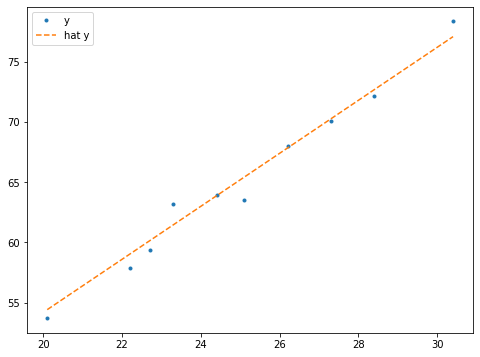

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(x,y,".",label="y")
plt.plot(x,10.2+2.2*x,"--",label ="hat y")
plt.legend()

### 목표

$$loss = \sum (y - \hat {y})^2 $$

* `loss`를 최소화 하는 것이 우리의 목표이다.

* 일일이 $\beta_i$의 값을 집어넣으면 `loss`를 최소화하는 $\beta_i$를 구할 수 있지만 사실상 무한번 저 과정을 반복하는 것은 불가능하다.

* 따라서 위를 각각의 $\beta_i$로 미분하면 다음과 같이 구할 수 있다.

$$\hat {\beta_1} = \frac {S_{xy}}{S_{xx}}  = \frac {\sum (x-\bar x)(y-\bar y)}{\sum {(x-\bar x)^2}}$$

$$\hat {\beta_0} =  \bar y - \hat {\beta_1}\bar x $$

In [ ]:
import numpy as np

In [ ]:
Sxx = sum((x- np.mean(x))**2)
Sxy = sum((x-np.mean(x))*(y-np.mean(y)))

In [ ]:
hat_b1 = Sxy/Sxx
hat_b0 = np.mean(y) - hat_b1*np.mean(x)

In [ ]:
hat_b1,hat_b0

(<tf.Tensor: shape=(), dtype=float32, numpy=2.311769>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.198574>)

`-` 위의 그래프와 비교해보자

* $y$ : 실제 값
* $\hat {y_1}$ : 우리가 일전에 가정한 것(세상의 법칡)
* $\hat {y_2}$ : 미분으로 구한 베타 추정치

$$\hat {y_1} = 10.2 + 2.2 x$$

$$\hat  {y_2} = \hat {\beta_{0,2}} + \hat {\beta_{1,2}} \times x $$

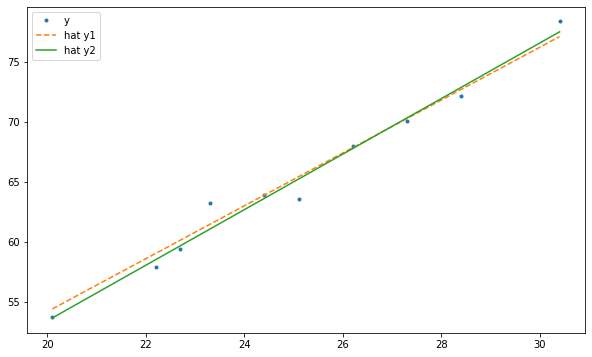

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(x, y,".", label = "y")
plt.plot(x, 10.2+2.2*x,"--", label = "hat y1")
plt.plot(x, hat_b1*x + hat_b0, label = "hat y2")
plt.legend()

*  여튼 미분을 통해서 $\beta_i$를 추정한다는 것은 수학적 관점에서 꽤나 훌륭한 방법인 것 같다.

* 그러나 만약 $x_i,i = 1,2,\dots 10009$  이런식으로 무수히 많은 변수가 존재할 경우 확장이 어렵고 \beta_i 를 추정하는데 어마어마한 시간이 걸릴 것임

* 이를 행렬구조로 바꾸어서 생각해보자

$$ \bf {y} = \bf {x} \boldsymbol{\beta} + \boldsymbol{\varepsilon}$$

* $\bf {y} \to (n\times 1)$

* $\bf {x} \to  (n \times p), \quad \boldsymbol {\beta} \to (\bf p \times 1), \quad \therefore \quad \bf {x} \boldsymbol{\beta} \to (n \times 1)$

* $\boldsymbol {\varepsilon} \to (\bf n \times 1)$

$$loss = \sum (y- \hat y)^2 = (\bf y - \bf X \boldsymbol {\beta} )^{\top}(\bf y - \bf X \boldsymbol {\beta} ) $$

위를 풀면

$$loss = \bf y^{\top}y - \bf y^{\top}\bf X \boldsymbol{\beta}  -\boldsymbol {\beta}^{\top} \bf {X}^{\top}y + \boldsymbol {\beta}^{\top}\bf{X}^{\top}\bf X \boldsymbol {\beta}$$

위를 미분하여  $loss$를 최소화하는 $\hat {\boldsymbol {\beta}}$를 구하면

$$\hat {\boldsymbol {\beta}} = (\bf {X^{\top} X})^{-1} \bf X^{\top} \bf y$$ 

`-` 이제 직접 코드를 짜서 $loss$를 최소화하는 $\hat {\boldsymbol{\beta}}$를 구해보자

#### 매트릭스를 이용한 베타 추정치 구하기

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior() ## numpy 처럼 사용하기 위해!

In [ ]:
x = tf.constant([20.1,22.2,22.7,23.3,24.4,25.1,26.2,27.3,28.4,30.4])
epsilon = tf.random.normal([10])
y = 10.2 + 2.2*x + epsilon
n = len(x)

In [ ]:
X = tf.concat([[[1.0]*n],[x]],0).T

In [ ]:
X

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1. , 20.1],
       [ 1. , 22.2],
       [ 1. , 22.7],
       [ 1. , 23.3],
       [ 1. , 24.4],
       [ 1. , 25.1],
       [ 1. , 26.2],
       [ 1. , 27.3],
       [ 1. , 28.4],
       [ 1. , 30.4]], dtype=float32)>

In [ ]:
print(tf.linalg.inv(X.T @ X) @ X.T @ y)

tf.Tensor([9.045627  2.2322702], shape=(2,), dtype=float32)


* 값이 좀 다르긴 한데 이는 텐서플로우가 계산을 대충하는 것임

* 실제로 정확한 계산을 위해  `tensorflow` 안에 내장된 `nummpy`를 이용하자

#### tensorflow의 정확한 계산을 위해!

In [ ]:
import tensorflow.experimental.numpy as tnp

In [ ]:
x = tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])
y = 10.2 + 2.2 *x +epsilon

In [ ]:
Sxx = sum((x-np.mean(x))**2)
Sxy = sum((x-np.mean(x))* (y-np.mean(y)))
beta1 =  Sxy/Sxx
beta0 = np.mean(y) - beta1*np.mean(x)

In [ ]:
[beta0,beta1]

[<tf.Tensor: shape=(), dtype=float64, numpy=9.045680157770313>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2.2322740618055756>]

In [ ]:
X = tnp.concatenate([[[1.0]*n],[x]]).T
tf.linalg.inv(X.T @ X) @ X.T @ y

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([9.04568016, 2.23227406])>

***

## Extra 

$$L = loss = (\bf y  -\bf X \boldsymbol{\beta})^{\top}(\bf y  -\bf X \boldsymbol{\beta})$$

* 위를 실제로 미분하여 수식을 써보장

$L = \bf y^{\top}y - \bf y^{\top} \bf X \boldsymbol{\beta} - \boldsymbol {\beta}^{\top} \bf X^{\top}y + \boldsymbol {\beta}^{\top} \bf X^{\top}X \boldsymbol {\beta}$

기억하자 

벡터든, 메트릭스든 $\frac {\partial}{\partial {x}}x^{\top}$는 $\bf I$ 가 성립한다.

### 벡터 미분

`1`. $\,\,\bf y^{\top}y = \sum y^{2}$

$\bf {y} \to (n \times 1), \quad \bf {y}^{\top} \to (1 \times n)$

$\bf y^{\top}y = \sum y^{2}\to (1\times 1)$ 이므로

$$\therefore \quad \frac {\partial \sum y^2}{\partial \boldsymbol {\beta}} = 0$$

`2`.  $\bf y^{\top} X \boldsymbol {\beta}$ 

$\bf y^{\top} X \boldsymbol {\beta} \to (1\times n)\, (n\times p)\, (p \times 1) = (1 \times 1) $ 이는

$(\bf y^{\top} X \boldsymbol {\beta})^{\top} = \boldsymbol{\beta}^{\top} \bf X^ {\top} \bf y  $ 를 의미한다

따라서

$$\frac {\partial }{\partial \boldsymbol \beta} \left (\boldsymbol {\beta}^{\top}\bf X^{\top}\bf y\right )= \bf X^{\top}\bf y$$

`3`. $\boldsymbol {\beta}^{\top} \bf {X}^{\top} \bf {X} \boldsymbol {\beta}$

알아야할 것 2

$\frac {\partial}{\partial y} y^{\top}y \neq = \bf I y$ 가 성립한다.


because !!

$y^{\top}y= y_1^{2} + y_2^{2}\dots y_n^{2}$ 이고

$\partial \, \bf y = [\,\partial y_1,\dots \partial y_n \,]$ 이므로 $(n \times 1) \times (1\times 1) \to (n\times 1)$이 성립한다.

따라서 위 같은 경우 $\frac {\partial}{\partial y} y^{\top}y= 2\bf y$ 이다.

이를 아래와 같이 표현할 수 있다.

$f(y) =  y^{\top}y,\quad g(y) = y^{\top}y$ 

$\frac {\partial }{\partial y} \left \{\, (f(y)+ g(y)\,\right \} = \frac {\partial}{\partial y} f(y) +\frac {\partial}{\partial y} g(y)$가 성립!

어렵게 썼지만 2번 미분한다고 생각하자!!

다시 돌아와서 아래식을 2번 미분하면? 

$\boldsymbol {\beta}^{\top} \bf X^{\top}\bf X \boldsymbol {\beta}   = \bf X^{\top}\bf X \boldsymbol {\beta} + \bf X^{\top}\bf X \boldsymbol {\beta}  = 2 \bf X^{\top}\bf X \boldsymbol {\beta}  $

$\frac {\partial}{\partial \boldsymbol {\beta}} L = 0 -2\bf X ^{\top}\bf y  + 2\bf X^{\top}\bf X \boldsymbol {\beta} =0$

$\bf X^{\top} \bf y = \bf X ^{\top}X \boldsymbol {\beta}$ 이므로

$$\hat {\boldsymbol {\beta}} = \left (  \bf X ^{\top}X\right )^{-1}\bf X^{\top}\bf y$$

***

## 2주차 : Tensorflow 

In [ ]:
import tensorflow as tf
import numpy as np

`-` tensoflow의 CPU 연결법

In [ ]:
tf.config.experimental.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### tf.constant

`-` 리스트

In [ ]:
lst = list(range(6))
lst

[0, 1, 2, 3, 4, 5]

`-` 중첩 리스트 (2 x 2) 

In [ ]:
lst = [[1,2],[3,4]]
lst

[[1, 2], [3, 4]]

`-` 중첩 리스트 (4 x 1)

In [ ]:
lst = [[1],[2],[3],[4]]
lst

[[1], [2], [3], [4]]

`-` 중첩 리스트 (1 x 4)

In [ ]:
lst = [list([1,2,3,4])]
lst

[[1, 2, 3, 4]]

### tensorflow의 변수 선언

#### 스칼라

In [ ]:
tf.constant(3.14)

<tf.Tensor: shape=(), dtype=float32, numpy=3.14>

In [ ]:
tf.constant(3.14) + tf.constant(3.14)

<tf.Tensor: shape=(), dtype=float32, numpy=6.28>

#### 벡터

In [ ]:
vector = tf.constant([1,2,3])
vector

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

#### 매트릭스

In [ ]:
matrix = tf.constant([[1,0],[0,1]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 0],
       [0, 1]], dtype=int32)>

#### 3차원 이상의 배열

In [ ]:
np.array( [[[0,1,1],[1,2,-1]], [[0,1,2],[1,2,-1]]])

array([[[ 0,  1,  1],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]]])

In [ ]:
tf.constant([[[0,1,1],[1,2,-1]], [[0,1,2],[1,2,-1]]])

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 0,  1,  1],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]]], dtype=int32)>

In [ ]:
tf.constant([[[0,1,1],[1,2,-1]], [[0,1,2],[1,2,-1]],[[0,1,2],[1,2,-1]]])

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 0,  1,  1],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]]], dtype=int32)>

In [ ]:
type(tf.constant([[[0,1,1],[1,2,-1]], [[0,1,2],[1,2,-1]]]))

tensorflow.python.framework.ops.EagerTensor

`EagerTensor`가 나오는 것을 기억하자

#### 인덱싱

In [ ]:
matrix  = tf.constant([[[0,1,1],[1,2,-1]], [[0,1,2],[1,2,-1]],[[0,1,2],[1,2,-1]]])
matrix

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 0,  1,  1],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]]], dtype=int32)>

In [ ]:
matrix[0][1][2], matrix[0][1][1]

(<tf.Tensor: shape=(), dtype=int32, numpy=-1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

##### tf.constant의 단점

`-` 모든 원소의 데이터 타입이 동일해야하고, 데이터 타입의 묵시적 변환이 불가능하다.

`-` 원소 수정이 불가능함

In [ ]:
a = tf.constant([1,2])
a

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [ ]:
a[0]

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
a[0] =11

TypeError: ignored

### tf.constant -> 넘파이 

In [ ]:
np.array([tf.constant(1)])

array([1], dtype=int32)

In [ ]:
a = tf.constant(3.14)
type(a)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
a.numpy()

tensorflow.python.framework.ops.EagerTensor

### 연산

#### 더하기 

In [ ]:
a = tf.constant([1,2])
b = tf.constant([3,4])
a+b

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [ ]:
a+b

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [ ]:
tf.add(a,b)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

#### 곱하기

`-` 아래값을 살펴보면 우리가 일반적으로 원하는 행렬 연산이 수행되지 않는다

In [ ]:
a = tf.constant([[1,2],[3,4]])
b = tf.constant([[5,6],[7,8]])

In [ ]:
a*b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 5, 12],
       [21, 32]], dtype=int32)>

`-` 아래와 같은 연산자를 이용하자

In [ ]:
a@b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

In [ ]:
tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

#### 역행렬

`-` 초기 매트릭스를 `int`로 설정할 경우 역행렬 연산이 수행되지 않는다.

In [ ]:
tf.linalg.inv(a)

InvalidArgumentError: ignored

In [ ]:
a = tf.constant([[1,2],[3,4]], dtype=float)
tf.linalg.inv(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-2. ,  1. ],
       [ 1.5, -0.5]], dtype=float32)>

`-` 위와 같이 `dtype`을 실수로 설정해야 역행렬 연산이 가능하다

#### 행렬식 (determinant) 계산 

In [ ]:
tf.linalg.det(a)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

#### Trace(대각합) 계산

In [ ]:
tf.linalg.trace(a)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

### 형태변환

#### 2 x 2

In [ ]:
a = tf.constant(range(1,5))
a

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [ ]:
tf.reshape(a,(2,2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
temp = tf.reshape(a,(2,2,1))
temp

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[1],
        [2]],

       [[3],
        [4]]], dtype=int32)>

#### 다차원의 적용 

In [ ]:
a = tf.constant(range(1,13))
a

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)>

In [ ]:
tf.reshape(a,(2,2,3))

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int32)>

In [ ]:
tf.reshape(a,(2,2,-1))

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int32)>

In [ ]:
tf.reshape(a,(4,3))

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [ ]:
tf.reshape(a,(4,-1)) ## 이거는 난 죽어도 안쓸 것 같으니 알아만 두자

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [ ]:
b = tf.reshape(a,(2,2,-1))
b

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int32)>

In [ ]:
tf.reshape(b,-1)

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)>

In [ ]:
c = tf.reshape(a,(4,-1)) ## 이거는 난 죽어도 안쓸 것 같으니 알아만 두자
c

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [ ]:
tf.reshape(c,-1)

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)>

### 선언고급

* 리스트나 넘파이로 만들고 `output` 을 `tensor`로 변경하는 것도 좋은 방법이다.

In [ ]:
l = list(range(1,5))
l

[1, 2, 3, 4]

In [ ]:
tf.constant(l)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [ ]:
tf.constant(np.diag(l))

<tf.Tensor: shape=(4, 4), dtype=int64, numpy=
array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])>

#### tf.zeros, tf.ones 

`-` 같은 방법이지만 `dtype`이 달라짐을 주의하자

In [ ]:
tf.zeros([3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
tf.reshape(tf.constant([0]*9),[3,3])

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)>

In [ ]:
tf.ones([3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
tf.reshape(tf.constant([1]*9),[3,3])

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)>

In [ ]:
tf.linspace(0,1,10)

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])>

### tf.concat 쌉중요

#### 저차원 행렬 

`step.1` (2 x 1) 행렬 생성 

In [ ]:
a = tf.constant([[1],[2]])
b = tf.constant([[3],[4]])
a,b

(<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
 array([[1],
        [2]], dtype=int32)>, <tf.Tensor: shape=(2, 1), dtype=int32, numpy=
 array([[3],
        [4]], dtype=int32)>)

`step.2` (1 x 2) + (1 x 2) $\to$ (2 x 2) or (1 x 4)

In [ ]:
tf.concat([a,b],axis=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 3],
       [2, 4]], dtype=int32)>

In [ ]:
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3],
       [4]], dtype=int32)>

In [ ]:
a = tf.constant([[1,2]])
b = tf.constant([[3,4]])
a,b

(<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 2]], dtype=int32)>,
 <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[3, 4]], dtype=int32)>)

In [ ]:
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
tf.concat([a,b],axis=1)

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 2, 3, 4]], dtype=int32)>

#### 고차원 행렬 (2 x 2 x 3)

`-` 내 생각 1 : 다차원의 경우 기존 `n x p` 의 케이크를 썬다고 생각하자

`-` 내 생각 2 : `tf.concat`에서 다차원의 경우 `axis` 값이 늘어날 수록 차원은 저차원으로 간다고 생각하자

In [ ]:
a = tf.reshape(tf.constant(range(12)),(2,2,3))
b = -a

`-` 즉, 아래 `a`는 `4 x 3`행렬을 `2 x 2 x 3`으로 쪼갠 것이다.

In [ ]:
tf.reshape(tf.constant(range(12)),(4,3))

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]], dtype=int32)>

In [ ]:
a

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]], dtype=int32)>

In [ ]:
a.shape

TensorShape([2, 2, 3])

In [ ]:
temp = tf.concat([a,b],axis=0)

In [ ]:
temp.shape

TensorShape([4, 2, 3])

In [ ]:
temp

<tf.Tensor: shape=(4, 2, 3), dtype=int32, numpy=
array([[[  0,   1,   2],
        [  3,   4,   5]],

       [[  6,   7,   8],
        [  9,  10,  11]],

       [[  0,  -1,  -2],
        [ -3,  -4,  -5]],

       [[ -6,  -7,  -8],
        [ -9, -10, -11]]], dtype=int32)>

In [ ]:
temp = tf.concat([a,b],axis=1)

In [ ]:
temp.shape

TensorShape([2, 4, 3])

In [ ]:
temp

<tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
array([[[  0,   1,   2],
        [  3,   4,   5],
        [  0,  -1,  -2],
        [ -3,  -4,  -5]],

       [[  6,   7,   8],
        [  9,  10,  11],
        [ -6,  -7,  -8],
        [ -9, -10, -11]]], dtype=int32)>

In [ ]:
temp = tf.concat([a,b],axis=2)

In [ ]:
temp.shape

TensorShape([2, 2, 6])

In [ ]:
temp

<tf.Tensor: shape=(2, 2, 6), dtype=int32, numpy=
array([[[  0,   1,   2,   0,  -1,  -2],
        [  3,   4,   5,  -3,  -4,  -5]],

       [[  6,   7,   8,  -6,  -7,  -8],
        [  9,  10,  11,  -9, -10, -11]]], dtype=int32)>

#### 주의할 거

`-` 차원이 `(n,)` 이런식으로 되어있을 경우

In [ ]:
a = tf.constant (range(4))
b = -a

In [ ]:
a.shape

TensorShape([4])

In [ ]:
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([ 0,  1,  2,  3,  0, -1, -2, -3], dtype=int32)>

In [ ]:
tf.concat([a,b],axis=1)

InvalidArgumentError: ignored

`-` 위 같은 에러가 안뜨게 하려면

In [ ]:
a = tf.constant([list(range(4))])
b=-a

In [ ]:
a.shape

TensorShape([1, 4])

In [ ]:
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 0, -1, -2, -3]], dtype=int32)>

In [ ]:
tf.concat([a,b],axis=1)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[ 0,  1,  2,  3,  0, -1, -2, -3]], dtype=int32)>

### tf.stack 

#### 저차원의 경우

In [ ]:
 a = tf.constant(range(4))
 b = -a

In [ ]:
a.shape

TensorShape([4])

In [ ]:
tf.stack([a,b],axis=0)

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 0, -1, -2, -3]], dtype=int32)>

In [ ]:
tf.stack([a,b],axis=1)

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[ 0,  0],
       [ 1, -1],
       [ 2, -2],
       [ 3, -3]], dtype=int32)>

#### 고차원의 경우

In [ ]:
a = tf.reshape(tf.constant(range(12)),(2,2,3))
b = -a
a.shape

TensorShape([2, 2, 3])

In [ ]:
a

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]], dtype=int32)>

In [ ]:
temp = tf.stack([a,b],axis=0)
temp.shape

TensorShape([2, 2, 2, 3])

In [ ]:
temp

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  3,   4,   5]],

        [[  6,   7,   8],
         [  9,  10,  11]]],


       [[[  0,  -1,  -2],
         [ -3,  -4,  -5]],

        [[ -6,  -7,  -8],
         [ -9, -10, -11]]]], dtype=int32)>

In [ ]:
temp = tf.stack([a,b],axis=1)
temp.shape

TensorShape([2, 2, 2, 3])

In [ ]:
temp

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  3,   4,   5]],

        [[  0,  -1,  -2],
         [ -3,  -4,  -5]]],


       [[[  6,   7,   8],
         [  9,  10,  11]],

        [[ -6,  -7,  -8],
         [ -9, -10, -11]]]], dtype=int32)>

In [ ]:
temp = tf.stack([a,b],axis=2)
temp.shape

TensorShape([2, 2, 2, 3])

In [ ]:
temp

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  0,  -1,  -2]],

        [[  3,   4,   5],
         [ -3,  -4,  -5]]],


       [[[  6,   7,   8],
         [ -6,  -7,  -8]],

        [[  9,  10,  11],
         [ -9, -10, -11]]]], dtype=int32)>

#### Summary 

* `tf.concat` : 케이크를 차원 수만큼 썰고 다시 합하는데 설정한 접시에 수는 변하지 않는다. (즉, 두 그룹의 각각 접시(차원) 수를 합한 차원은 변하지 않는다)

* `tf.stack` : 케이크를 차원 수만큼 썰고 다시 합하는데 이때는 접시가 하나 추가된다.

* `tf.concat` 과 `tf.stack`의 `axis` 는 `axis`가 늘어날 수록 세부 요소로 간다는 것!!

### tnp

 - tf는 넘파이에 비해 만드는 것이 상당히 힘듬

* 울지말자 나같은 생각을 하는 어떤 천재가 이미 만들어 놨으니 케케

In [ ]:
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

* 이제 자료형이 달라도 연산이 가능하다

In [ ]:
tnp.array([1,2,3]) + tnp.array([1.0,2.0,3.0])

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 6.])>

In [ ]:
tf.constant([1,2,3])+tf.constant([1.0,2.0,3.0])

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 6.])>

In [ ]:
tnp.array([1,2,3]) *tnp.array([1.0,2.0,3.0])

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 4., 9.])>

In [ ]:
a= tnp.diag([1,2,3])
a

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])>

#### 심지어

In [ ]:
tnp.array(1) + tnp.array([1.0,2.0,3.0])

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 3., 4.])>

In [ ]:
a= tnp.diag([1,2,3])
a

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])>

In [ ]:
a.min(), a.max()

(<tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=3>)

In [ ]:
a.reshape(9,1)

<tf.Tensor: shape=(9, 1), dtype=int64, numpy=
array([[1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [3]])>

#### 선언 고급 

In [ ]:
np.random.randn(5)

array([-1.78435059,  1.29045981,  0.08127629, -0.79964532,  0.72590563])

In [ ]:
tnp.random.randn(5)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 0.96818851,  1.46349868, -1.97239766,  0.93021469, -0.41628377])>

In [ ]:
type(np.random.randn(5))

numpy.ndarray

In [ ]:
type(tnp.random.randn(5))

tensorflow.python.framework.ops.EagerTensor

#### 그러나....

In [ ]:
a = tnp.array(range(4))
a

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 2, 3])>

In [ ]:
a[0]=11

TypeError: ignored

* 여전히 기존 변수의 원소 값을 새로운 값으로 할당하는 것은 불가능하다.

#### Summary of tnp

* `numpy` 처럼 사용이 가능

* 심지어 묵시적 형변환도 가능

* 그러나 여전히  **기존 변수의 새로운 값을 할당하는 것은 불가능하다** 

***

## 3주차

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

In [ ]:
tf.config.experimental.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 지난강의 보충

In [ ]:
a = tf.constant(range(1,5))
a

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [ ]:
a.mean(), tf.reduce_mean(a)

(<tf.Tensor: shape=(), dtype=float64, numpy=2.5>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

#### stack

In [ ]:
a = tf.reshape(tf.constant(range(12)),(2,2,3))
b=-a
a.shape

TensorShape([2, 2, 3])

In [ ]:
tf.stack([a,b],axis=0)

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  3,   4,   5]],

        [[  6,   7,   8],
         [  9,  10,  11]]],


       [[[  0,  -1,  -2],
         [ -3,  -4,  -5]],

        [[ -6,  -7,  -8],
         [ -9, -10, -11]]]], dtype=int32)>

In [ ]:
tf.stack([a,b],axis=1)

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  3,   4,   5]],

        [[  0,  -1,  -2],
         [ -3,  -4,  -5]]],


       [[[  6,   7,   8],
         [  9,  10,  11]],

        [[ -6,  -7,  -8],
         [ -9, -10, -11]]]], dtype=int32)>

In [ ]:
tf.stack([a,b],axis=2)

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  0,  -1,  -2]],

        [[  3,   4,   5],
         [ -3,  -4,  -5]]],


       [[[  6,   7,   8],
         [ -6,  -7,  -8]],

        [[  9,  10,  11],
         [ -9, -10, -11]]]], dtype=int32)>

In [ ]:
tf.stack([a,b],axis=3)

<tf.Tensor: shape=(2, 2, 3, 2), dtype=int32, numpy=
array([[[[  0,   0],
         [  1,  -1],
         [  2,  -2]],

        [[  3,  -3],
         [  4,  -4],
         [  5,  -5]]],


       [[[  6,  -6],
         [  7,  -7],
         [  8,  -8]],

        [[  9,  -9],
         [ 10, -10],
         [ 11, -11]]]], dtype=int32)>

In [ ]:
tf.stack([a,b],axis=-1)

<tf.Tensor: shape=(2, 2, 3, 2), dtype=int32, numpy=
array([[[[  0,   0],
         [  1,  -1],
         [  2,  -2]],

        [[  3,  -3],
         [  4,  -4],
         [  5,  -5]]],


       [[[  6,  -6],
         [  7,  -7],
         [  8,  -8]],

        [[  9,  -9],
         [ 10, -10],
         [ 11, -11]]]], dtype=int32)>

#### concat

(2,2,3),(2,2,3),(2,2,3) $\to$ (?,?,?)

In [ ]:
a = tf.reshape(tf.constant(range(12)),(2,2,3))
b = -a
c= 2*a

In [ ]:
tf.concat([a,b,c],axis=0)

<tf.Tensor: shape=(6, 2, 3), dtype=int32, numpy=
array([[[  0,   1,   2],
        [  3,   4,   5]],

       [[  6,   7,   8],
        [  9,  10,  11]],

       [[  0,  -1,  -2],
        [ -3,  -4,  -5]],

       [[ -6,  -7,  -8],
        [ -9, -10, -11]],

       [[  0,   2,   4],
        [  6,   8,  10]],

       [[ 12,  14,  16],
        [ 18,  20,  22]]], dtype=int32)>

In [ ]:
tf.concat([a,b,c],axis=1)

<tf.Tensor: shape=(2, 6, 3), dtype=int32, numpy=
array([[[  0,   1,   2],
        [  3,   4,   5],
        [  0,  -1,  -2],
        [ -3,  -4,  -5],
        [  0,   2,   4],
        [  6,   8,  10]],

       [[  6,   7,   8],
        [  9,  10,  11],
        [ -6,  -7,  -8],
        [ -9, -10, -11],
        [ 12,  14,  16],
        [ 18,  20,  22]]], dtype=int32)>

In [ ]:
tf.concat([a,b,c],axis=2)

<tf.Tensor: shape=(2, 2, 9), dtype=int32, numpy=
array([[[  0,   1,   2,   0,  -1,  -2,   0,   2,   4],
        [  3,   4,   5,  -3,  -4,  -5,   6,   8,  10]],

       [[  6,   7,   8,  -6,  -7,  -8,  12,  14,  16],
        [  9,  10,  11,  -9, -10, -11,  18,  20,  22]]], dtype=int32)>

In [ ]:
a=tf.reshape(tf.constant(range(2*3*4)),(2,3,4))
b=tf.reshape(-tf.constant(range(4*3*4)),(4,3,4))

In [ ]:
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(6, 3, 4), dtype=int32, numpy=
array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]],

       [[  0,  -1,  -2,  -3],
        [ -4,  -5,  -6,  -7],
        [ -8,  -9, -10, -11]],

       [[-12, -13, -14, -15],
        [-16, -17, -18, -19],
        [-20, -21, -22, -23]],

       [[-24, -25, -26, -27],
        [-28, -29, -30, -31],
        [-32, -33, -34, -35]],

       [[-36, -37, -38, -39],
        [-40, -41, -42, -43],
        [-44, -45, -46, -47]]], dtype=int32)>

`-` 아래와 같은 경우 `axis=0`의 차원이 같지 않아 에러가 뜨는 것임

In [ ]:
tf.concat([a,b],axis=1)

InvalidArgumentError: ignored

In [ ]:
tf.concat([a,b],axis=2)

InvalidArgumentError: ignored

### (2,2) @ (2,) 연산

#### numpy

In [ ]:
a = np.diag([1,1])
b = np.array([77,-88])

In [ ]:
a.shape

(2, 2)

In [ ]:
b.shape

(2,)

In [ ]:
a @ b

array([ 77, -88])

* `numpy`의 경우 무리없이 잘 되는 것 같다.

#### tensorflow

In [ ]:
I = tf.constant(np.diag([1,1]),dtype="float")
x = tf.constant([77.0, -88.0])

In [ ]:
I.shape

TensorShape([2, 2])

In [ ]:
x.shape

TensorShape([2])

In [ ]:
I @ x

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 77., -88.], dtype=float32)>

In [ ]:
x @ I

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 77., -88.], dtype=float32)>

* 원래 안되는 데 위에서 `tnp` 설정을 해놔서 그럼

In [ ]:
I @ tf.reshape(x,(2,1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 77.],
       [-88.]], dtype=float32)>

In [ ]:
tf.reshape(x,(1,2)) @ I 

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 77., -88.]], dtype=float32)>

* 그냥 `tnp` 쓰는게 편하다...

### tnp.Variable()

`1`. 기본 선언 

In [ ]:
tf.Variable(range(1,5))

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

`2`. `tf.constant()`선언 후 변환

In [ ]:
tf.Variable(tf.constant(range(1,5)))

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

`3`. `numpy` 선언 후 변환

In [ ]:
tf.Variable(np.array([1,2,3,4]))

<tf.Variable 'Variable:0' shape=(4,) dtype=int64, numpy=array([1, 2, 3, 4])>

In [ ]:
a= tf.Variable([1,2,3,4])
id(a)

140086641080720

In [ ]:
a

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [ ]:
a.assign_add([-1,-2,-3,-4])

<tf.Variable 'UnreadVariable' shape=(4,) dtype=int32, numpy=array([0, 0, 0, 0], dtype=int32)>

In [ ]:
a

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([0, 0, 0, 0], dtype=int32)>

In [ ]:
id(a)

140086641080720

#### Summary 

* `tf.constant` 와 `tf.Variable`의 큰 차이는 잘 모르겠음

* 그냥 `tnp`가 최고임

### 미분 

$$y = 3x ^2$$

위 식의  $x=2$에서 접선의 기울기를 구해보자

#### 고등수학

$$(x=2)\to\frac {\partial}{\partial x} 3x^2 = 6 x = 12$$

#### 컴퓨터를 이용한 풀이

In [ ]:
x1=2 
y1=3*x1**2

In [ ]:
x2 = 2+0.000001
y2 = 3*x2**2

In [ ]:
(y2-y1)/(x2-x1)

12.000003000266702

어찌어찌 근사값이 나온다.

#### 사용자 함수를 정의

In [ ]:
def f(x) :
    return (3*x**2)

In [ ]:
def d(f,x) :
    return (f(x+0.0000001)- f(x))/(0.0000001)

In [ ]:
d(f,2)

12.000000282341716

#### lambda 사용

In [ ]:
d(lambda x :  3*x**2,2)

12.000000282341716

#### 결합분포

$$f(x,y) = x^2 + 3y $$

In [ ]:
def f(x,y) :
      return (x**2+3*y)

In [ ]:
f(2,3)

13

In [ ]:
d(f,(2,3))

TypeError: ignored

* 사전에 y값에 대한 설정은 안하고 도함수를 정의했으므로 당연히 에러가 뜬다

#### tf.GradientTape()

$$y = 3x^2$$

In [ ]:
x = tf.Variable(2.0)
a = tf.Variable(3.0) 

In [ ]:
mytape = tf.GradientTape()
mytape.__enter__() ## 기록시작
y = a*x**2 ## y 정의
mytape.__exit__(None,None,None) ## 기록끝

*  `y`를 `x=2`로 미분

In [ ]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

***

$$a= \frac 32 x$$

$$y = ax^2 = \frac 32 x^3$$

$$ \frac {\partial y}{\partial x} = \frac 92 x^{2}$$

In [ ]:
x = tf.Variable(2.0)

mytape = tf.GradientTape()
mytape.__enter__()
a = (3/2)*x
y = a*x**2
mytape.__exit__(None,None,None)

In [ ]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

`-` 근데 뭐가 좀 이상하다? 

우리는 $x=2$로 설정했기 때문에 $a=3$으로 인식해서

$$a= 3$$

$$y = ax^2 = 3 x^2$$

$$ \frac {\partial y}{\partial x} = 6x =12$$

이렇게 되야지 않나??

이걸 풀어서 쓰면

In [ ]:
x = tf.Variable(2.0)
a = (3/2)*x

mytape = tf.GradientTape()
mytape.__enter__()
y = a*x**2
mytape.__exit__(None,None,None)

In [ ]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

##### summary

* mytape을 컴퓨터에게 넘겨줄 연습장이라고 생각하자.

* 우리는 `a`를 연습장 밖에서 선언했기 때문에 `a`를 변수가 아닌 상수 취급한다

* 즉,우리는 컴퓨터와 대화하는 입장에서 적절한 위치에 적절한 변수 선언을 해주어 한다.

#### with 

python
```
 with expression as myname:
    ## with문 시작: myname.__enter__() 
    blabla ~ 
    yadiyadi !! 
    ## with문 끝: myname.__exit__()
```

`1`. expression의 실행결과 $\to$ 오브젝트 생성

`2`. 생성된 오브젝트는  `.__enter__()`, `.__exit__()`를 숨겨진 기능으로 포함해야한다.

`3`. with문이 시작되면서 `myname.__enter__()`가 실행

`4`. 그 후 밑에 짜바리들 실행되고 

`5`. 마지막에 `myname.__exit__()`가 실행되며 종료함 

$$ a = \frac 32 x$$

$$y = a x^2$$

위 예제로 돌아와보자

`-` 미분한 값이 `12`로 나오는 경우

In [ ]:
x = tf.Variable(2.0)
a = (3/2)*x
with tf.GradientTape() as mytape :
    y=a*x**2

In [ ]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

`-` 미분한 값이 정상적인 `18`로 나오려면?

In [ ]:
x = tf.Variable(2.0)
with tf.GradientTape() as mytape :
    a = (3/2)*x
    y=a*x**2

In [ ]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

`-` `persistent`를 쓰면 값을 보존하기 때문에 `mytape.gradient`를 두번 실행해도 에러가 나지 않음

In [ ]:
x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as mytape :
    a = (3/2)*x
    y=a*x**2

In [ ]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

`-` 관찰 1: $x$ 값을 `constant`로 전달했을 경우

In [ ]:
x=tf.constant(2.0)

with tf.GradientTape(persistent=True) as mytape:
    a=(x/2)*3 ## a=(3/2)x 
    y=a*x**2  ## y=ax^2 = (3/2)x^3

In [ ]:
print(mytape.gradient(y,x))

None


`-` $x$를  상수로 선언했기 때문에 변수로 인식하지 않는다.

`2` 관찰 2: $x =$ `constant`, `watch`적용

In [ ]:
x=tf.constant(2.0)

with tf.GradientTape(persistent=True) as mytape:
    mytape.watch(x)
    a=(x/2)*3 ## a=(3/2)x 
    y=a*x**2  ## y=ax^2 = (3/2)x^3

In [ ]:
print(mytape.gradient(y,x))

tf.Tensor(18.0, shape=(), dtype=float32)


`-` `watch`는 수동감시모드로 임의의 상수로 선언한 객체를 감시하여 변수처럼 취급한다.

`3` 관찰 3 : $x=$ `Variable`, `자동감시해제`

In [ ]:
x=tf.constant(2.0)
with tf.GradientTape(persistent=True,watch_accessed_variables=False) as mytape:
    a=(x/2)*3 ## a=(3/2)x 
    y=a*x**2  ## y=ax^2 = (3/2)x^3

자동 감시 모드를 해제하였기 때문에 변수로 선언한 값도 상수취급함

In [ ]:
print(mytape.gradient(y,x))

None


#### 정리

* `tensorflow`의 `GradientTape`을 이용해 미분값을 구할시 `tf.constant`와 `tf.Variable`의 차이가 극명히 들어난다

* 또한 컴퓨터와 대화하는 메모장선언 시 변수의 위치를 고려해야한다!

## 4주차 : 미분

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

### 카페예제 (중간고사 기출문제)

$$y \approx 10.2 + 2.2x + ɛ$$

In [ ]:
x = tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])

epsilon = tnp.random.randn(10)

y = 10.2 + 2.2*x + epsilon

#### 초기 베타값 설정

In [ ]:
beta0 = tf.Variable(9.0)
beta1 = tf.Variable(2.0)

#### loss 정의

In [ ]:
with tf.GradientTape(persistent = True) as tape : 
  loss = sum((y-beta0-beta1*x)**2)

#### 미분값 계산

In [ ]:
tape.gradient(loss,beta0), tape.gradient(loss,beta1)

(<tf.Tensor: shape=(), dtype=float32, numpy=-126.90627>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-3217.9387>)

#### 매트릭스 버전

`-` $\bf X\to (10 \times 2)$

In [ ]:
X = tnp.array([[1.0]*10,x]).reshape(2,10).T

`-` $\boldsymbol {\beta} \to (2\times 1)$

In [ ]:
beta_true = tnp.array([10.2,2.2]).reshape(2,1)

`-` $y \to (10 \times 1)$

In [ ]:
tnp.random.seed(202150256)

y = X@beta_true + tnp.random.randn(10).reshape(10,1)
y

<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[55.80570022],
       [58.06839247],
       [58.76324706],
       [61.33410375],
       [62.81827495],
       [63.45381384],
       [69.00421863],
       [70.73413289],
       [71.64628327],
       [75.23973972]])>

##### 임의의 베타값 설정

In [ ]:
beta_temp = tnp.array([9.0,2.0]).reshape(2,1)

##### 매트릭스 버전의 미분값 확인

$$loss = (\bf y - X\boldsymbol{\beta})^{\top}(\bf y - X\boldsymbol{\beta}) =(\bf y - \hat {y})^{\top}(\bf y - \hat y) $$

In [ ]:
with tf.GradientTape(persistent = True) as tape :
    tape.watch(beta_temp)
    yhat = X@beta_temp
    loss = (y-yhat).T @ (y-yhat)  

`-` tensorflow가 계산한 손실함수의 미분값 

In [ ]:
tape.gradient(loss, beta_temp)

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -113.33581358],
       [-2847.34947422]])>

`-` 이론적인 값과 동일한지 확인

$$\frac {\partial}{\partial \boldsymbol \beta } loss = -2\bf X^{\top}y + 2X^{\top}X \boldsymbol \beta$$

In [ ]:
tape.gradient(loss, beta_temp),-2*X.T@y + 2*X.T@X@beta_temp

(<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
 array([[ -113.33581358],
        [-2847.34947422]])>, <tf.Tensor: shape=(2, 1), dtype=float64, numpy=
 array([[ -113.33581358],
        [-2847.34947422]])>)

`-` 베타 추정치 계산

$$\hat {\boldsymbol \beta} = \left( \bf X^{\top}X \right )^{-1} \bf X^{\top}y $$

$$y \approx 10.2 + 2.2 x$$

In [ ]:
tf.linalg.inv(X.T@X) @ X.T @ y

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[12.84179765],
       [ 2.07297053]])>

#### 이론적 베타 추정치를 이용해 loss의 미분값이 0인지 확인

`-` 이론적으로 추정한 $\beta$로 $loss$를 미분했을 때 실제 베타에 대한 최적 추정치가 구해진 것이다.

In [ ]:
beta_optimal = tf.linalg.inv(X.T@X) @ X.T @ y

In [ ]:
with tf.GradientTape(persistent=True) as tape :
     tape.watch(beta_optimal)
     yhat = X@beta_optimal
     loss = (y-yhat).T @ (y-yhat)

`-` loss 의 기울기 계산

In [ ]:
tape.gradient(loss, beta_optimal)

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-6.56541488e-12],
       [-1.65769620e-10]])>

#### Summary

* 이론적으로 구한 쵲거의 베타를 이용하여 `loss`를 미분한 결과 `0` 보단 큰값을 산출하였다.

* 그러나 표본의 수가 커질 경우 최적치와 실제 베타값이 일치해질 것이다 (대수의 법칙!!)

### 경사하강법

$$loss = \left ( \frac 12 \beta -1\right )^2$$

* 위 같은 경우 당연히 $\beta = 2$일 때 최적화이다.

* 이를 컴퓨터로 구현

#### 방법 1: grid search

* 단순히 베타를 개많이 만들고 그 중에서 최적의 베타를 찾는다.

In [ ]:
beta = tnp.linspace(-10,10,1000)

In [ ]:
loss = ((1/2)*beta -1 )**2

* 찾아본 결과 `599` 번째 베타에서` loss` 값이 최소가 된다.

In [ ]:
tnp.argmin(loss)

<tf.Tensor: shape=(), dtype=int64, numpy=599>

In [ ]:
loss[599]

<tf.Tensor: shape=(), dtype=float64, numpy=1.603204806408293e-05>

##### 문제점

* 만약 설정한 범위밖에 해가 존재할 수 있음

* 최적의 해를 찾았지만 그 이후에도 탐색이 계속 진행됨

#### 방법 2: 확률적 경사하강법 (Stochastic Grandient Descent)



 `step 1`. 초기 베타값 설정

In [ ]:
((1/2)*(-5) -1)**2

12.25

`step 2`. `beta = -5`근처에서 조금씩 이동

In [ ]:
((1/2)*(-4.99) -1)**2

12.215025

In [ ]:
((1/2)*(-5.01) -1)**2

12.285025

 `step 3`. 위 결과를 보고 유리한 쪽으로 이동

`step 4`. 위 과정을 반복하고 어느쪽으로 이동해도 이득이 없다면 멈춤

이를 수식화하면

$$\beta_{new} = \beta_{old} + 0.01\, \to\,\, \frac {∂}{\partial \beta} loss < 0 $$

$$\beta_{new} = \beta_{old} - 0.01\, \to\,\, \frac {∂}{\partial \beta} loss > 0 $$

* 알고리즘의 개선 $\to$ 동일하게 `0.01` 씩 이동하는 것이 맞나?

$$loss = \left ( \frac 12 \beta -1\right )^2$$

위의 경우 $\beta = 2$ 가 최적해임을 알고 있다.

$\beta = -10 $ 일경우 $loss^{\prime} = -6$

$\beta =-4 $ 일경우 $loss^{\prime} = -3$

* 위 같은 경우 최적해를 찾을 때 동일한 각 베타 지점에서 동일한 거리만큼 이동하면 계산 시간이 낭비된다.

* 따라서 이를 $\alpha  $ (learning rate) 를 이용하여 멀리 떨어질 수록 자신있게 성큼성큼 이동하자는 것이다.

$$\beta_{new } = \beta_{old} -  \alpha \times loss^{\prime}(\beta_{old}),\quad (\alpha >0) $$

#### 구현 코드

`iter1` : $\beta = -10$에서 출발

In [ ]:
beta = tf.Variable(-10.0)

In [ ]:
with tf.GradientTape(persistent=True) as tape:
    loss = ((1/2)*beta-1)**2

In [ ]:
tape.gradient(loss,beta)

<tf.Tensor: shape=(), dtype=float32, numpy=-6.0>

$\alpha$값 설정

In [ ]:
alpha = 0.01/6

계산된 $\beta$값 으로 값 변경

In [ ]:
beta.assign_sub(alpha*tape.gradient(loss,beta))

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-9.99>

`iter` $\beta = -9.99$

In [ ]:
with tf.GradientTape(persistent=True) as tape:
    loss = ((1/2)*beta-1)**2

In [ ]:
tape.gradient(loss,beta)

<tf.Tensor: shape=(), dtype=float32, numpy=-5.995>

In [ ]:
beta.assign_sub(alpha*tape.gradient(loss,beta))

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-9.980008>

걍 for문을 이용하자

In [ ]:
beta = tf.Variable(-10.0)
alpha = 0.01/6

In [ ]:
for i in range(100) : 
    with tf.GradientTape(persistent=True) as tape:
         loss = ((1/2)*beta-1)**2
    beta.assign_sub(tape.gradient(loss,beta))

In [ ]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

##### 학습률에 따른 최적해 수렴

* $beta : -10 \to -9 \to -8$ 이런식으로 이동한다고 가정

In [ ]:
beta_lst  = tnp.linspace(-10.0,-8.0,3)

In [ ]:
loss = ((beta_lst/2)-1)**2

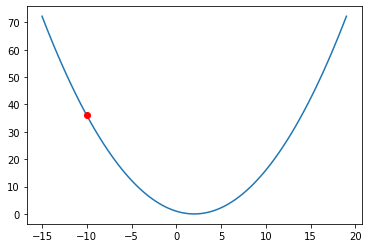

In [ ]:
fig = plt.figure() ## 도화지 생성
ax = fig.add_subplot() ## 도화지안의 틀 생성

_beta =  tnp.linspace(-15,19,100)  ## 도로생성한다고 생각하자
_loss = ((_beta/2)-1)**2

ax.plot(_beta,_loss)
pnts, = ax.plot(beta_lst[0],loss[0],"ro")

애니메이션 정의

In [ ]:
plt.rcParams["animation.html"]="jshtml"
from matplotlib import animation

In [ ]:
def animate(i): 
    pnts.set_xdata(beta_lst[:(i+1)])
    pnts.set_ydata(loss[:(i+1)])

In [ ]:
animation.FuncAnimation(fig,animate,frames=3)

* 확률적 경사하강법에 의도대로 애니메이션을 구현해보자

In [ ]:
beta = tf.Variable(-10.0)
_loss = ((beta.numpy()/2)-1)**2
alpha = 0.1

In [ ]:
beta_lst = []
loss_lst = []

beta_lst.append(beta.numpy())
loss_lst.append(_loss)

In [ ]:
for i in range(100) : 
    with tf.GradientTape(persistent=True) as tape : 
         tape.watch(beta)
         loss = (beta/2-1)**2
    beta.assign_sub(alpha*tape.gradient(loss,beta))
    beta_lst.append(beta.numpy())
    loss_lst.append((beta.numpy()/2-1)**2)

In [ ]:
_beta = tnp.linspace(-15,19,100)
_loss = ((_beta/2)-1)**2

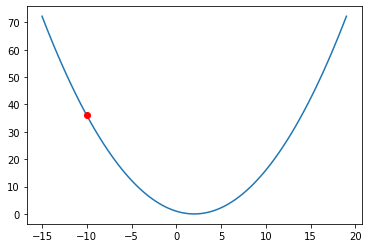

In [ ]:
fig = plt.figure()

ax = fig.add_subplot()
ax.plot(_beta,_loss)
pnts, = ax.plot(beta_lst[0],loss_lst[0],"ro")

In [ ]:
def animate(i): 
    pnts.set_xdata(beta_lst[:(i+1)])
    pnts.set_ydata(loss_lst[:(i+1)])

In [ ]:
animation.FuncAnimation(fig,animate,frames=100)

### 4주차 숙제

$y= (x-1)^2$의를 최소화하는 $x$를 확률적 경사하강법을 이용햇 찾고 수렴과정을 애니메이션으로 시각화

In [ ]:
x = tf.Variable(-3.0)
_y = (x.numpy()-1)**2

alpha = 0.1
x_lst = [x.numpy()]
y_lst = [_y]

for i in range(100) :
    with tf.GradientTape(persistent = True) as tape:
         y = (x-1)**2
    
    x.assign_sub(alpha*tape.gradient(y,x))
    x_lst.append(x.numpy())
    y_lst.append((x.numpy()-1)**2) ## 여기도 x.numpy 무조건 해주자 
                                    ## 안해주면 애니메이션작살난다

In [ ]:
_x = tnp.linspace(-4,6)
_y = (_x-1)**2

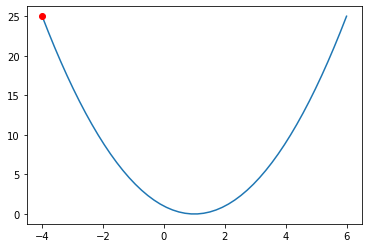

In [ ]:
fig =plt.figure()
ax= fig.add_subplot()
ax.plot(_x,_y)
pnts, = ax.plot(_x[0],_y[0],"ro")

In [ ]:
def animate(i): 
    pnts.set_xdata(x_lst[:(i+1)])
    pnts.set_ydata(y_lst[:(i+1)])

animation.FuncAnimation(fig,animate,frames=100)

## 5주차 

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

### 최적화의 문제점

* 모수적 특성(함수의 형태)을 알고 있어야함.

* 대부분의 모델, 손실 함수는 비모수적이기 때문에 다른 방법이 필요하다.

* `tf.keras.optimizers`를 사용하면 비모수적 형태인 경우에도 최적해를 찾을 수 있다.

### tf.keras.optimizers

#### 방법 1. opt.apply_gradients()

$$loss =( \frac {1}{2}\beta -1)^2 $$

`1`. 이전까지의 방법

In [35]:
beta = tf.Variable(-10.0)
alpha = 0.01/6

In [36]:
with tf.GradientTape() as tape :
    tape.watch(beta)
    loss = (beta/2-1)**2
slope = tape.gradient(loss,beta)

In [37]:
beta.assign_sub(slope*alpha)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-9.99>

`2`. 이전까지 방법 + 새로운 방법

`2-1`. iteration 1

In [38]:
beta = tf.Variable(-10.0)
alpha = 0.01/6
with tf.GradientTape() as tape :
    tape.watch(beta)
    loss = (beta/2-1)**2
slope = tape.gradient(loss,beta)

In [39]:
opt = tf.keras.optimizers.SGD(alpha)

In [40]:
opt.apply_gradients([(slope,beta)]) # beta.assign_sub(slope*alpha)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`2-2`. iteration 2

In [42]:
with tf.GradientTape() as tape :
    tape.watch(beta)
    loss = (beta/2-1)**2
slope = tape.gradient(loss,beta)
opt.apply_gradients([(slope,beta)])
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.980008>

`2-3`. 이를 for 문으로 정리

In [51]:
beta = tf.Variable(-10.0)
alpha = 0.01
for i in range(10000):
  with tf.GradientTape() as tape :
      tape.watch(beta)
      loss = (beta/2-1)**2
  slope = tape.gradient(loss,beta)
  opt.apply_gradients([(slope,beta)])

In [52]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

 * 만 번 수행하니 최적해의 가까워졌다...

#### 방법 2. opt.minimize()

* 위 함수를 이용하면 `GradientTape` 을 안써도 된다.

In [53]:
alpha = 0.01
beta = tf.Variable(-10.0)
opt = tf.keras.optimizers.SGD(alpha)

In [54]:
loss_fn = lambda : (beta/2-1)**2

In [55]:
for epoch in range(10000) :
    opt.minimize(loss_fn,beta)

In [56]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9999881>

### 회귀분석 문제

$$y \approx 2.5 +4x$$

In [144]:
tnp.random.seed(202150256)
N = 200
x = tnp.linspace(0,1,N)
epsilon = tnp.random.randn(N)*0.5

y = 2.5 + 4*x + epsilon
y_hat = 2.5+ 4*x

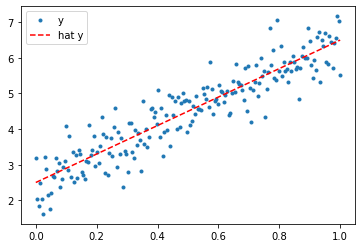

In [156]:
plt.plot(x,y, ".",label="y")
plt.plot(x,y_hat,"r--", label ="hat y")
plt.legend()

#### 이론적 풀이

`1`. 스칼라 버전

In [71]:
Sxx = sum((x-x.mean())**2)
Sxy = sum((x-x.mean())*(y-y.mean()))

In [72]:
beta1 = Sxy/Sxx
beta0 = y.mean() - beta1*x.mean()
beta1,beta0

(<tf.Tensor: shape=(), dtype=float64, numpy=4.002338936365215>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2.4902077529954156>)

`2`. 벡터 버전

In [86]:
X = tf.stack([tf.ones(N,dtype="float64"),x],axis=1)

In [87]:
y = y.reshape(N,1)

In [88]:
tf.linalg.inv(X.T@X)@X.T@y

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.49020775],
       [4.00233894]])>

`3`. 벡터버전, 손실함수의 도함수이용

(단, 텐서플로우의 미분기능을 사용하지 않음)

$$loss^{\prime}(\boldsymbol{\beta}) = -2\bf X ^{\top}y + 2X^{\top}X\boldsymbol{\beta}$$

In [205]:
X=tf.stack([tf.ones(N,dtype='float64'),x],axis=1)
y=y.reshape(N,1) 
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [206]:
beta_hat = tnp.array([-5,10]).reshape(2,1)
alpha = 0.001

In [207]:
for epoc in range(1000) : 
  slope = -2*X.T@y + 2*X.T@X@beta_hat
  beta_hat = beta_hat - alpha*slope

In [208]:
beta_hat

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.49020775],
       [4.00233894]])>

#### GradientTape을 이용

`풀이 1` 벡터 버전

* $\alpha = 0.001$로 하지 않으면 `Nan`값이 뜬다...

In [226]:
alpha = 0.001
beta = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))

In [227]:
for i in range(1000) : 
    with tf.GradientTape(persistent = True) as tape :
         yhat = X@beta
         loss = (y-yhat).T @ (y-yhat)
    slope = tape.gradient(loss,beta)
    beta.assign_sub(alpha*slope)

In [228]:
beta

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.49020775],
       [4.00233894]])>

`풀이 2` 스칼라버전

In [290]:
y = y.reshape(200,)

In [291]:
beta0 = tf.Variable(-5.0)
beta1 = tf.Variable(10.0)

In [292]:
alpha = 0.001

In [293]:
for i in range(1000):
    with tf.GradientTape() as tape :
         yhat = beta0 + beta1*x
         loss = tf.reduce_sum((y-yhat)**2)
    slope0,slope1 = tape.gradient(loss,[beta0,beta1])
    beta0.assign_sub(alpha*slope0)
    beta1.assign_sub(alpha*slope1)

In [294]:
beta0,beta1

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.4902039>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0023465>)

#### GradientTape + opt.apply_gradients

`풀이 1` 벡터버전

In [295]:
y = y.reshape(200,1)

In [303]:
beta = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [304]:
alpha = 0.001
opt = tf.optimizers.SGD(alpha)

In [305]:
for i in range(1000) :
  with tf.GradientTape() as tape : 
      yhat = X@beta
      loss = (y-yhat).T @ (y-yhat)
  slope = tape.gradient(loss,beta)
  opt.apply_gradients([(slope,beta)])

In [306]:
beta

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.49020775],
       [4.00233894]])>

`풀이 2` 스칼라 버전

In [308]:
y = y.reshape(200,)
beta0 =tf.Variable(-5.0)
beta1 =tf.Variable(10.0)
alpha = 0.001

In [311]:
for i in range(1000) :
    with tf.GradientTape() as tape : 
        yhat = beta0 + beta1*x
        loss = tf.reduce_sum((y-yhat)**2)
    slope0, slope1 = tape.gradient(loss,[beta0,beta1])
    opt.apply_gradients([(slope0,beta0),(slope1,beta1)])

In [312]:
beta0,beta1

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.4902039>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0023465>)

#### opt.minimize

`풀이 1` 벡터버전, 사용자정의 함수 사용

In [317]:
y = y.reshape(200,1)
beta = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))

In [318]:
loss_fn = lambda : (y-X@beta).T @ (y-X@beta)

In [319]:
alpha = 0.001
opt = tf.optimizers.SGD(alpha)

In [321]:
for epoc in range(1000) : 
    opt.minimize(loss_fn,beta)

In [322]:
beta

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.49020775],
       [4.00233894]])>

`풀이 2` 스칼라 버전, 사용자 정의함수 

In [325]:
beta0 = tf.Variable(-5.0)
beta1 = tf.Variable(10.0)

In [326]:
y = y.reshape(200)

In [327]:
loss_fn = lambda : tf.reduce_sum((y-beta0-beta1*x)**2)

In [328]:
alpha = 0.001
opt = tf.optimizers.SGD(alpha)

In [329]:
for i in range(1000) :
    opt.minimize(loss_fn, [beta0,beta1])

In [330]:
beta0,beta1

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.4902039>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0023465>)

`풀이 3` tf.losses.MSE 벡터버전

In [391]:
y = y.reshape(200,1)

In [392]:
beta = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))

In [393]:
def loss_fn() :
    yhat = X@beta
    loss = tf.keras.losses.MSE(y.reshape(200,),yhat.reshape(200,))
    return loss

In [394]:
alpha = 0.1
opt = tf.optimizers.SGD(alpha)

In [395]:
for i in range(1000) :
    opt.minimize(loss_fn,beta)

In [396]:
beta

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.49020123],
       [4.00235111]])>

`풀이 4` tf.losses.MeaSquaredError, 벡터 버전

In [422]:
mse_fn = tf.losses.MeanSquaredError()

In [423]:
y = y.reshape(N,1)

In [424]:
beta = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))

In [425]:
def loss_fn():
    yhat = X@beta
    loss = mse_fn(y.reshape(200,),yhat.reshape(200,))
    return loss

In [426]:
alpha = 0.1
opt = tf.optimizers.SGD(alpha)

In [427]:
for epoc in range(1000) : 
    opt.minimize(loss_fn,beta)

In [428]:
beta

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.49020123],
       [4.00235111]])>

`풀이 5` tf.keras.Sequential, 벡터 버전 

In [480]:
net = tf.keras.Sequential()

In [481]:
net.add(tf.keras.layers.Dense(units=1,input_shape=(2,),use_bias=False))

*  `units` = layer의 출력 차원, 우리의 경우 $\hat y$의 차원

* `input_shape`는 layer의 입력 차원으로 우리의 경우 $\bf X$의 차원 (200,2) $\to$ 2임 

In [482]:
def loss_fn(y,yhat) :
    return (y-yhat).T @ (y-yhat)

In [483]:
alpha = 0.001
opt = tf.optimizers.SGD(alpha)

* 신경망의 초기 베타값 설정

In [484]:
net.set_weights([tnp.array([[-5.0],[10.0]])])

In [485]:
net.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-5.],
        [10.]], dtype=float32)>]

In [486]:
net.compile(opt,loss =loss_fn )

In [487]:
net.fit(X,y,epochs=1000,batch_size=N,verbose=0) ##verbose = 0 은 log 지우는것

In [488]:
net.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.4902039],
        [4.0023465]], dtype=float32)>]